In [1]:
!unzip '/content/drive/My Drive/students/student.zip' -d '/content/drive/My Drive/students'

Archive:  /content/drive/My Drive/students/student.zip
  inflating: /content/drive/My Drive/students/student-mat.csv  
  inflating: /content/drive/My Drive/students/student-por.csv  
  inflating: /content/drive/My Drive/students/student-merge.R  
  inflating: /content/drive/My Drive/students/student.txt  


# Student Performance Data Set(EDA and prediction of marks)
The dataset is taken from : https://archive.ics.uci.edu/ml/datasets/Student+Performance#

## Problem:
**To predict the Grade for specific course of the student by given set of features.**

## Data Dictionary  
The Features and the desciption of them are given in the link provided above.

But also this information is stored in the `data` variable as shown below.

In [224]:
with open('/content/drive/My Drive/students/student.txt') as f:
  data = f.read()

In [225]:
print(data)

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or 

In [222]:
# Importing Required libraries
# EDA
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#Magic function
%matplotlib inline

## Collecting Data 

## Math course

In [229]:
df1 = pd.read_csv('/content/drive/My Drive/students/student-mat.csv', sep=';')

In [18]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Checking for Null values

In [22]:
df1.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [26]:
features = ['school', 'sex', 'age', 'guardian','studytime','schoolsup','paid','activities','nursery','internet','romantic','famrel','freetime','goout','health', 'absences']
grades = ['G1','G2','G3']

In [29]:
features.extend(grades)

In [34]:
df1[features]

,school,sex,age,guardian,studytime,schoolsup,paid,activities,nursery,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,mother,2,yes,no,no,yes,no,no,4,3,4,3,6,5,6,6
1,GP,F,17,father,2,no,no,no,no,yes,no,5,3,3,3,4,5,5,6
2,GP,F,15,mother,2,yes,yes,no,yes,yes,no,4,3,2,3,10,7,8,10
3,GP,F,15,mother,3,no,yes,yes,yes,yes,yes,3,2,2,5,2,15,14,15
4,GP,F,16,father,2,no,yes,no,yes,no,no,4,3,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,other,2,no,yes,no,yes,no,no,5,5,4,4,11,9,9,9
391,MS,M,17,mother,1,no,no,no,no,yes,no,2,4,5,2,3,14,16,16
392,MS,M,21,other,1,no,no,no,no,no,no,5,5,3,3,3,10,8,7
393,MS,M,18,mother,1,no,no,no,no,yes,no,4,4,1,5,0,11,12,10


## Data Visualization EDA(Exploratory Data Analysis)

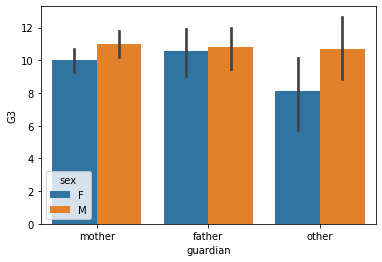

In [230]:
# Grade if there is a guardian to the student
sns.barplot(x='guardian', y='G3', data=df1, hue='sex')

In [231]:
hr_vals = df1['studytime'].unique()
hr_vals.sort()
hr_vals

array([1, 2, 3, 4])

In [76]:
st1 = df1[df1['studytime']==1]['G3'].mean()
st2 = df1[df1['studytime']==2]['G3'].mean()
st3 = df1[df1['studytime']==3]['G3'].mean()
st4 = df1[df1['studytime']==4]['G3'].mean()
st1,st2,st3,st4

(10.047619047619047, 10.171717171717171, 11.4, 11.25925925925926)

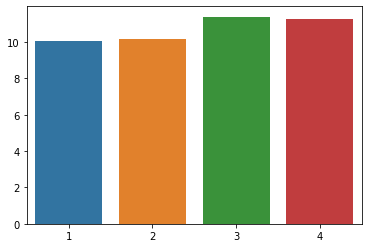

In [87]:
# No. of studytime vs grade
sns.barplot(hr_vals, [st1,st2,st3,st4])

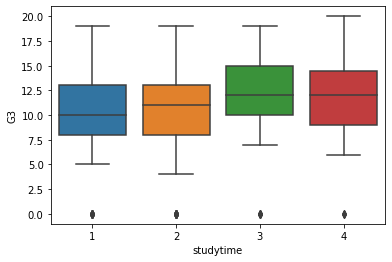

In [75]:
sns.boxplot(x='studytime', y ='G3', data=df1)

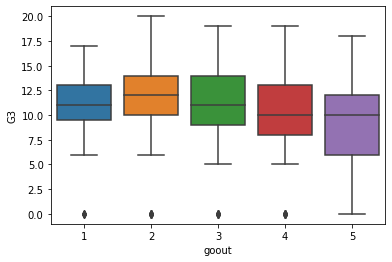

In [109]:
# Grades according to go out with friends
sns.boxplot(x='goout', y ='G3', data=df1)

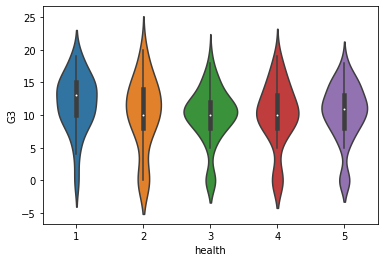

In [113]:
# Grades according to Health status
sns.violinplot(x='health', y ='G3', data=df1)

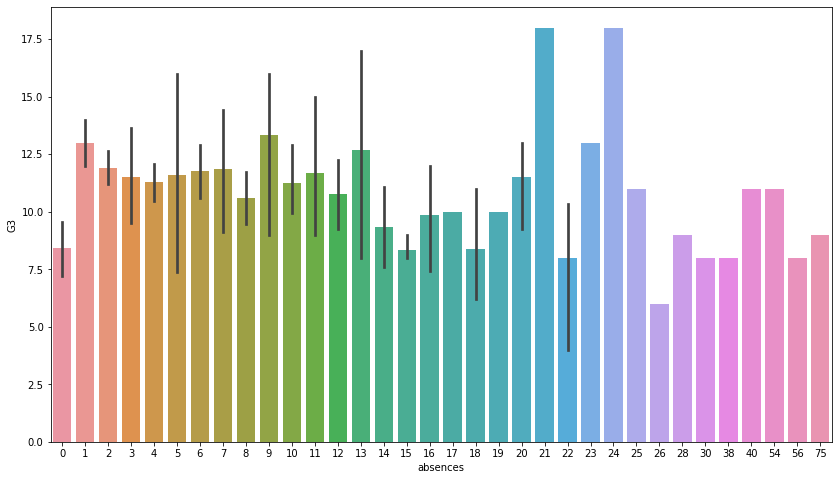

In [235]:
plt.figure(figsize=(14,8))
sns.barplot(x='absences', y ='G3', data=df1)

Text(0, 0.5, 'Final grades')

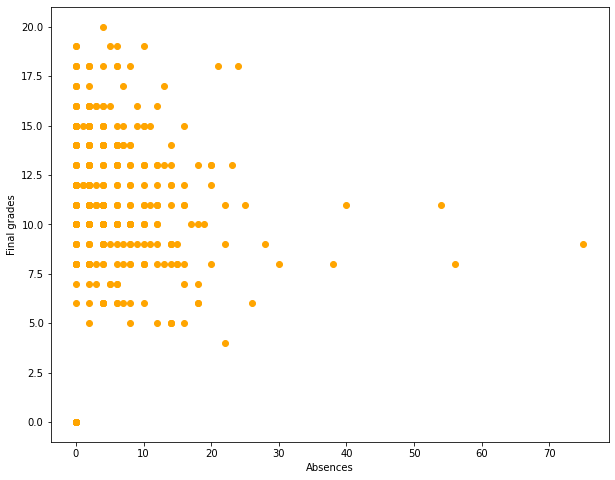

In [120]:
# Grades according to number of days students were absent
plt.figure(figsize=(10,8))
plt.scatter(df1['absences'],df1['G3'], c = ['orange'])
plt.xlabel('Absences')
plt.ylabel('Final grades')

In [135]:
# Correlation between studytime and final Grades
df1[['studytime', 'G3']].corr()

,studytime,G3
studytime,1.00000,0.09782
G3,0.09782,1.00000


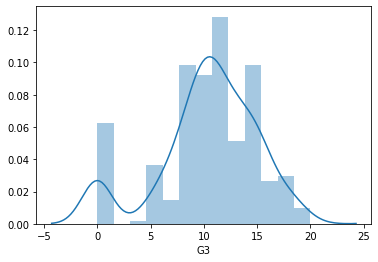

In [236]:
# Grades Distribution
sns.distplot(df1['G3'])

As we can see there are many outliers in the data therefore we can use some of the standardized method to scale our data.
ex. `MinMaxScalar`

In [105]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


### Selecting Features and then convert categorical values to numeric values

In [284]:
df1['guardian'] = pd.get_dummies(df1['guardian'], drop_first=True)

In [285]:
df1['paid']  = pd.get_dummies(df1['paid'], drop_first=True)

In [286]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,1,2,2,0,yes,no,0,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,0,1,2,0,no,yes,0,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,1,1,2,3,yes,no,1,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,1,1,3,0,no,yes,1,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,0,1,2,0,no,yes,1,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## Modeling

In [244]:
features

['school',
 'sex',
 'age',
 'guardian',
 'studytime',
 'schoolsup',
 'paid',
 'activities',
 'nursery',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

### Splitting the data to `training` and `testing` sets.

In [287]:
X = df1[['guardian', 'paid', 'studytime','goout', 'health', 'absences', 'G1', 'G2']]
y = df1['G3']

### train test split of our data (Independant and Dependant Variables)

#### Imports 

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Here we're using LinearRegression() model.

In [291]:
model = LinearRegression()

In [292]:
model.fit(X_train,  y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [293]:
model.score(X_train, y_train)

0.8297592754519495

In [294]:
# Predictions
preds = model.predict(X_test)

In [295]:
# Converting the above predictions(floats having fractions) to int round up values
round_val =[]
for i in preds:
  round_val.append(int(round(i)))

In [296]:
print(round_val)

[15, 14, 9, 16, 16, 3, 9, 13, 7, 13, 15, 5, 19, 13, 11, 9, 14, 9, 13, 19, 12, 11, 9, 7, 12, 10, 12, 5, 7, 9, 13, 15, 13, 6, 11, 12, 8, 11, 15, 15, 10, 13, 8, 8, 19, 16, 12, 11, 18, 14, 11, 20, 19, 7, 0, 13, 12, 13, 13, 16, 10, 11, 13, 8, 11, 15, 13, 6, 8, 9, 4, 13, 8, 20, 18, 15, 10, 13, 13]


In [297]:
for i in range(round(len(X_test)/3)): #round becoz to slice
  print(np.array(X_test)[i], round_val2[i], y_test.iloc[i])

[ 0  1  2  3  3  0 14 15] 15 16
[ 1  0  1  4  1  6 11 14] 15 14
[ 0  0  2  5  4  4 10 10] 14 10
[ 0  0  3  2  4  0 18 16] 12 16
[ 1  0  1  2  3  2 17 15] 12 15
[1 0 1 3 4 0 7 4] 12 0
[ 1  1  3  3  5 28 10  9] 10 9
[ 1  0  2  4  5  0 13 13] 9 12
[1 1 2 3 1 0 8 8] 12 0
[ 1  1  2  4  4  0 12 13] 16 14
[ 1  1  2  4  1  0 16 15] 8 15
[ 1  0  1  5  5 16  6  5] 14 5
[ 1  1  4  2  3  6 18 18] 11 18
[ 1  1  3  2  4  8 14 13] 9 14
[ 0  0  3  2  4  4 10 12] 7 12
[ 1  0  2  2  4  4  8 10] 13 10
[ 1  1  2  2  5 23 13 13] 11 13
[ 0  0  2  4  2  0 10 10] 9 10
[ 1  0  2  4  5  0 13 13] 15 13
[ 1  0  4  2  2  4 19 19] 5 20
[ 1  1  3  2  5  2 12 12] 14 11
[ 1  1  2  5  4  4 10 11] 12 9
[ 1  1  3  3  4  2 10  9] 12 10
[0 0 2 1 4 0 9 8] 15 0
[ 0  1  2  3  3  8 14 12] 12 12
[ 1  0  3  3  3 10 12 10] 15 12


#### Using MinMax Scalar

In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
scalar = MinMaxScaler()

In [300]:
df_dummy = df1[['guardian', 'paid', 'studytime','goout', 'health', 'absences', 'G1', 'G2','G3']]

In [301]:
data = pd.DataFrame(scalar.fit_transform(df_dummy), columns=df_dummy.columns)

In [302]:
data.head()

,guardian,paid,studytime,goout,health,absences,G1,G2,G3
0,1.0,0.0,0.333333,0.75,0.5,0.080000,0.1250,0.315789,0.30
1,0.0,0.0,0.333333,0.50,0.5,0.053333,0.1250,0.263158,0.30
2,1.0,1.0,0.333333,0.25,0.5,0.133333,0.2500,0.421053,0.50
3,1.0,1.0,0.666667,0.25,1.0,0.026667,0.7500,0.736842,0.75
4,0.0,1.0,0.333333,0.25,1.0,0.053333,0.1875,0.526316,0.50


In [303]:
X = data.drop('G3', axis=1)
y = data.G3

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [305]:
l_model = LinearRegression()

In [306]:
l_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
l_model.score(X_train, y_train)

0.8351373925344501